In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/Airlines+Data.xlsx')

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
import matplotlib.pyplot as plt

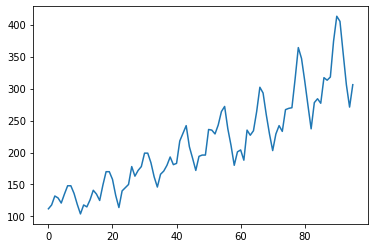

In [6]:
plt.plot(df.iloc[:,1])

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
df.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.iloc[:,1:])

In [10]:
df.shape

(96, 1)

In [11]:
df

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [17]:
# Splitting data into train and test 
train_size = int(len(df)*0.65)

In [21]:
train_size

62

In [19]:
test_size = len(df)-train_size

In [20]:
test_size

34

In [22]:
train_data, test_data = df[0:train_size,:],df[train_size:len(df),:1]

In [23]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [24]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [30]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a =dataset[i:(i+time_step),0] # i = 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
# reshape into X =t, t+1, t+2, t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [34]:
# reshape input to be [ sample, time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [35]:
X_train.shape

(57, 4, 1)

In [37]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=1)

Epoch 1/100
57/57 [==============================] - 4s 17ms/step - loss: 0.0148 - val_loss: 0.0334
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0306
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0352
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0304
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0306
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0449
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0478
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0456
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0391
Epoch 10/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0465
Epoch 11

In [40]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [41]:
test_predict

array([[0.56060684],
       [0.6683341 ],
       [0.5488032 ],
       [0.40524524],
       [0.38516787],
       [0.35196733],
       [0.47035238],
       [0.49160832],
       [0.39990583],
       [0.55343276],
       [0.54294336],
       [0.49761376],
       [0.70146954],
       [0.84623414],
       [0.6347531 ],
       [0.4856355 ],
       [0.47515562],
       [0.42130452],
       [0.6284024 ],
       [0.6214339 ],
       [0.49493277],
       [0.6881017 ],
       [0.64296037],
       [0.59333545],
       [0.8515874 ],
       [0.92106825],
       [0.73265547],
       [0.54625916],
       [0.49176326]], dtype=float32)

In [42]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [43]:
test_predict

array([[277.2275 ],
       [310.51523],
       [273.5802 ],
       [229.2208 ],
       [223.01688],
       [212.75792],
       [249.33888],
       [255.90698],
       [227.5709 ],
       [275.01074],
       [271.7695 ],
       [257.76266],
       [320.7541 ],
       [365.48636],
       [300.13873],
       [254.06137],
       [250.82309],
       [234.1831 ],
       [298.17636],
       [296.0231 ],
       [256.93423],
       [316.62344],
       [302.67477],
       [287.34067],
       [367.1405 ],
       [388.6101 ],
       [330.39053],
       [272.7941 ],
       [255.95485]], dtype=float32)

In [44]:
y_train.shape, train_predict.shape, train_predict

((57,), (57, 1), array([[131.19159],
        [126.01928],
        [142.80682],
        [152.81686],
        [151.04623],
        [140.50562],
        [126.98479],
        [114.12376],
        [126.77035],
        [117.52578],
        [130.69427],
        [145.01343],
        [136.95847],
        [130.62764],
        [158.58849],
        [176.00316],
        [171.74684],
        [161.31013],
        [140.08452],
        [126.24763],
        [152.13644],
        [148.0899 ],
        [153.93849],
        [187.12532],
        [163.36732],
        [179.7277 ],
        [187.58855],
        [208.59207],
        [203.33833],
        [184.82664],
        [168.40657],
        [157.85208],
        [180.8499 ],
        [178.15546],
        [185.91208],
        [201.30972],
        [183.31238],
        [190.57512],
        [234.49751],
        [236.94717],
        [242.12175],
        [201.12039],
        [193.89917],
        [185.50061],
        [210.83705],
        [204.97514],
        [199.6069 

In [45]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

184.44200072438147

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

284.1402822876784

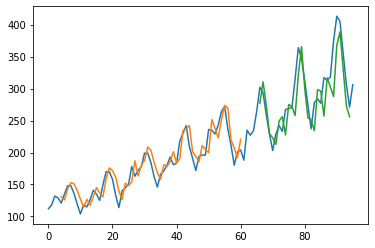

In [48]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()